# [CIS442D Advanced Business Analysis]
## Basemap Example 2 _ Plot the rate of endorsement of the President Barrack Obama on the U.S. map.

In this example, we will plot the rate of endorsement of the former president, Mr. Barrack Obama, by using the contributions to presidential campaigns data.

The plotted rate will be different by states and the density displayed in each state represents the strength of the support rate.

- Source for the example : ⟪ McKinney, Wes. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.", 2012.⟫


- Link for the dataset : http://www.fec.gov/disclosurep/PDownload.do

In [14]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import shapefile

# to install 'shapefile' : type "pip install pyshp" on the command shell

In [15]:
fec = pd.read_csv('P00000001-ALL.csv')
unique_cands = fec.cand_nm.unique()
parties = {'Bachmann, Michelle':'Republican',
           'Romney, Mitt':'Republican', 
           'Obama, Barack': 'Democrat',
           "Roemer, Charles E. 'Buddy' III" : 'Republican', 
           'Pawlenty, Timothy': 'Republican',
           'Johnson, Gary Earl': 'Republican', 
           'Paul, Ron':'Republican', 
           'Santorum, Rick':'Republican', 
           'Cain, Herman':'Republican',
           'Gingrich, Newt':'Republican', 
           'McCotter, Thaddeus G':'Republican', 
           'Huntsman, Jon':'Republican',
           'Perry, Rick': 'Republican'}

fec['party'] = fec.cand_nm.map(parties)  # Mapping parties to each candidate
fec = fec[fec.contb_receipt_amt > 0]  # Restrict the data set to positive contributions
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]  # Make subset for main two candidates

/Users/Woojin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# Aggregate the data by candidate and state
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
percent = totals.div(totals.sum(1), axis= 0)  # Get the relative percentage of total donations by state

obama = percent['Obama, Barack']  # Save the obama's percentage of total donations by state to plot on map

In [17]:
# Set up the US map
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
lllat = 21; urlat = 53; lllon = -118; urlon=-62
m = Basemap(ax=ax, projection = 'stere', lon_0 = (urlon+lllon)/2,
            lat_0 = (urlat+lllat)/2, llcrnrlat = lllat, urcrnrlat = urlat,
            llcrnrlon = lllon, urcrnrlon = urlon, resolution = 'l')
m.drawcoastlines()
m.drawcountries()

In [18]:
# Load state-border data
sh = shapefile.Reader('statesp020/statesp020')
shapes = sh.shapes()
records = sh.records()

In [19]:
# Give code to each state
state_to_code = {'Alaska': 'AK', 'Alabama': 'AL', 'Arkansas' : 'AR', 'American Samoa' : 'AS',
                 'Arizona': 'AZ', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT',
                 'District of Columbia' : 'DC', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
                 'Gaum' : 'GU', 'Hawaii':'HI', 'Iowa' : 'IA', 'Idaho' : 'ID', 'Illinois':'IL',
                 'Indiana' : 'IN', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA',
                 'Massachusetts' : 'MA', 'Maryland' : 'MD', 'Maine' : 'ME', 'Michigan' : 'MI',
                 'Minnesota' : 'MN', 'Missouri' : 'MO', 'Northern Mariana Islands' : 'MP', 'Mississippi' : 'MS',
                 'Montana' : 'MT', 'Natioanl': 'NA', 'North Carolina' : 'NC', 'North Dakota' : 'ND',
                 'Nebraska' : 'NE', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM',
                 'Nevada' : 'NV', 'New York' : 'NY', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR',
                 'Pennsylvania' : 'PA', 'Puerto Rico' : 'PR', 'Rhode Island' : 'RI', 'South Carolina' : 'SC',
                 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT',
                 'Virginia' : 'VA', 'U.S. Virgin Islands' : 'VI', 'Vermont' : 'VT', 'Washington' : 'WA',
                 'Wisconsin' : 'WI', 'West Virginia' : 'WV', 'Wyoming': 'WY'}

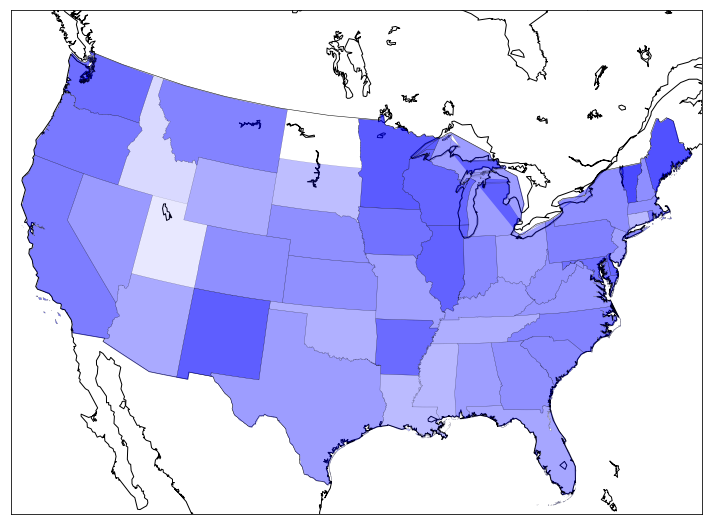

In [20]:
# Color states by Obama's percentage of total donations                 
for record, shape in zip(records, shapes):
    lons, lats = zip(*shape.points)  # Latitude & Longitude of each state
    data = np.array(m(lons, lats)).T

    try:
        per = obama[state_to_code[record[3]]]  # State's percentage of Obama
    except KeyError:
        continue
    
    lines = LineCollection([data, ], antialiaseds=(1,)) 
    lines.set_facecolors('b')  # Setting color for coloring
    lines.set_alpha(0.75 * per)  # Setting color density
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3) 
    ax.add_collection(lines)
    
plt.show()        